# Assignment 2 (10 Marks)

Please submit this file only.

Name: Torin Borton-McCallum

Student ID:  190824620

## Question 1

Please use this same dataset as in Assignment 1 for the following plot:

Visualize the time series for Regular Unleaded Gasoline prices in Ottawa from 2000 to 2023. Smooth the time series using a simple moving average with a window size of 40. Plot both the original time series and its trend in one plot.

Your visualization should be complete.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv('energy-price.csv')
data.head(10)

,_id,Date,Ottawa,Toronto West/Ouest,Toronto East/Est,Windsor,London,Peterborough,St. Catharine's,Sudbury,...,Thunder Bay,North Bay,Timmins,Kenora,Parry Sound,Ontario Average/Moyenne provinciale,Southern Average/Moyenne du sud de l'Ontario,Northern Average/Moyenne du nord de l'Ontario,Fuel Type,Type de carburant
0,1,1990-01-03T00:00:00,55.9,49.1,48.7,45.2,50.1,0.0,0.0,56.4,...,56.6,55.1,58.1,0.0,0.0,50.3,49.5,56.2,Regular Unleaded Gasoline,Essence sans plomb
1,2,1990-01-10T00:00:00,55.9,47.7,46.8,49.7,47.6,0.0,0.0,56.4,...,56.8,55.0,58.2,0.0,0.0,49.2,48.3,56.2,Regular Unleaded Gasoline,Essence sans plomb
2,3,1990-01-17T00:00:00,55.9,53.2,53.2,49.6,53.7,0.0,0.0,55.8,...,56.8,54.4,58.2,0.0,0.0,53.6,53.3,56.0,Regular Unleaded Gasoline,Essence sans plomb
3,4,1990-01-24T00:00:00,55.9,53.2,53.5,49.0,52.1,0.0,0.0,55.7,...,56.8,54.3,58.2,0.0,0.0,53.5,53.2,56.0,Regular Unleaded Gasoline,Essence sans plomb
4,5,1990-01-31T00:00:00,55.9,51.9,52.6,48.6,49.1,0.0,0.0,55.6,...,56.8,54.2,58.1,0.0,0.0,52.5,52.1,55.9,Regular Unleaded Gasoline,Essence sans plomb
5,6,1990-02-07T00:00:00,55.8,50.7,50.7,48.5,47.8,0.0,0.0,55.6,...,56.8,54.2,58.1,0.0,0.0,51.4,50.8,55.9,Regular Unleaded Gasoline,Essence sans plomb
6,7,1990-02-14T00:00:00,55.8,49.3,48.4,48.5,54.7,0.0,0.0,55.6,...,56.9,54.1,58.1,0.0,0.0,50.7,50.1,55.9,Regular Unleaded Gasoline,Essence sans plomb
7,8,1990-02-21T00:00:00,55.8,48.2,47.1,48.6,53.6,0.0,0.0,55.6,...,57.0,54.0,58.1,0.0,0.0,49.9,49.1,55.9,Regular Unleaded Gasoline,Essence sans plomb
8,9,1990-02-28T00:00:00,55.9,54.1,54.4,48.5,51.7,0.0,0.0,55.6,...,57.0,54.1,58.1,0.0,0.0,54.1,53.8,55.9,Regular Unleaded Gasoline,Essence sans plomb
9,10,1990-03-07T00:00:00,56.0,53.8,53.8,48.3,50.8,0.0,0.0,55.6,...,57.0,54.0,58.1,0.0,0.0,53.7,53.4,55.9,Regular Unleaded Gasoline,Essence sans plomb


                     Date  Ottawa
522   2000-01-05T00:00:00    62.8
523   2000-01-12T00:00:00    62.0
524   2000-01-19T00:00:00    64.2
525   2000-01-26T00:00:00    62.6
526   2000-02-02T00:00:00    63.0
...                   ...     ...
1769  2023-11-27T00:00:00   144.5
1770  2023-12-04T00:00:00   143.8
1771  2023-12-11T00:00:00   140.3
1772  2023-12-18T00:00:00   143.3
1773  2023-12-27T00:00:00   142.5

[1252 rows x 2 columns]


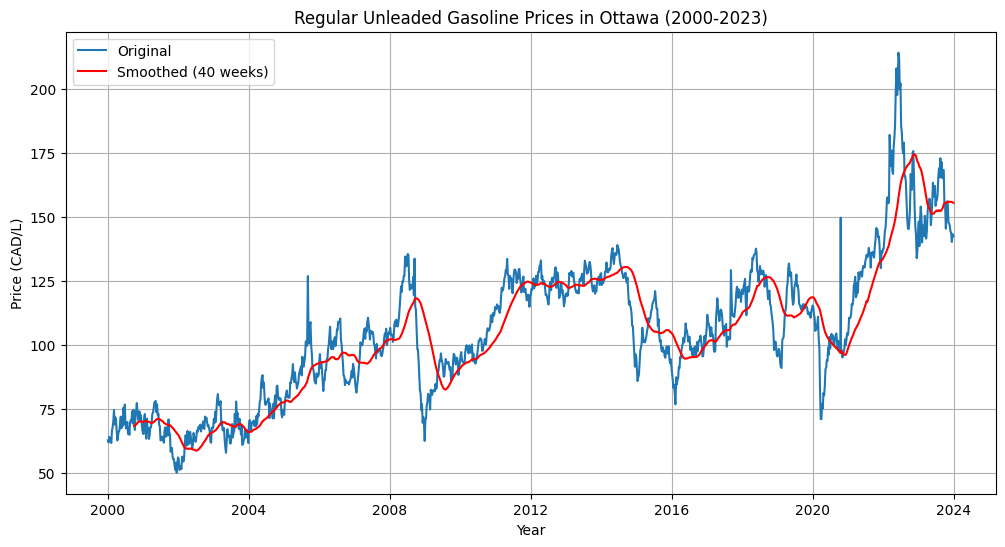

In [7]:
ottawa_data = data[(data['Date'].str[:4].astype(int) >= 2000) &
                   (data['Date'].str[:4].astype(int) <= 2023) & (data['Fuel Type'] == "Regular Unleaded Gasoline")]
# Filter data for Regular Unleaded Gasoline in Ottawa
ottawa_data = ottawa_data[['Date', 'Ottawa']]
print(ottawa_data)

# Convert 'Date' column to datetime
ottawa_data['Date'] = pd.to_datetime(ottawa_data['Date'])

# Sort DataFrame by 'Date'
ottawa_data = ottawa_data.sort_values(by='Date')

# Smooth the time series using a simple moving average with window size 40
ottawa_data['Smoothed'] = ottawa_data['Ottawa'].rolling(window=40).mean()

# Plot original and smoothed
plt.figure(figsize=(12, 6))
plt.plot(ottawa_data['Date'], ottawa_data['Ottawa'], label='Original')
plt.plot(ottawa_data['Date'], ottawa_data['Smoothed'], color='red', label='Smoothed (40 weeks)')
plt.title('Regular Unleaded Gasoline Prices in Ottawa (2000-2023)')
plt.xlabel('Year')
plt.ylabel('Price (CAD/L)')
plt.legend()
plt.grid(True)
plt.show()

## Question 2

Please plot a map of Canada showing the volcanoes and earthquakes, with the earthquakes' magnitude represented by color. Your visualization should be complete.

Data sources:
https://github.com/plotly/datasets/blob/master/volcano_db.csv
https://earthquakescanada.nrcan.gc.ca/stndon/NEDB-BNDS/bulletin-en.php

In [ ]:
import pandas as pd
import geopandas

## volcanoes in the world
volcano = pd.read_csv('volcano_db.csv', encoding = "ISO-8859-1")
## world map
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
## earthquakes in Canada
earthquake = pd.read_csv('earthquake.txt',sep='|')

<ipython-input-25-db6f553f9ac3>:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


In [ ]:
# write your code here
volcano.head()

,Number,Volcano Name,Country,Region,Latitude,Longitude,Elev,Type,Status,Last Known
0,0803-001,Abu,Japan,Honshu-Japan,34.500,131.600,571.0,Shield volcano,Holocene,Unknown
1,1505-096,Acamarachi,Chile,Chile-N,-23.300,-67.620,6046.0,Stratovolcano,Holocene,Unknown
2,1402-08=,Acatenango,Guatemala,Guatemala,14.501,-90.876,3976.0,Stratovolcano,Historical,D1
3,0103-004,Acigol-Nevsehir,Turkey,Turkey,38.570,34.520,1689.0,Maar,Holocene,U
4,1201-04-,Adams,United States,US-Washington,46.206,-121.490,3742.0,Stratovolcano,Tephrochronology,D6


In [ ]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
earthquake.head(5)

,#EventID,Time,Latitude,Longitude,Depth/km,MagType,Magnitude,EventLocationName
0,2.024022e+07,2024-02-15T12:20:23.000Z,52.9496,-132.6097,20.00,ML,1.57,"49 km SW of Village of Queen Charlotte, BC/49 ..."
1,2.024022e+07,2024-02-15T12:11:59.000Z,53.8583,-132.6976,14.24,ML,1.99,"38 km NW of Port Clements, BC/38 km NO de Port..."
2,2.024022e+07,2024-02-15T11:35:58.000Z,49.6455,-127.4595,15.19,ML,1.79,"82 km S of Port Alice, BC/82 km S de Port Alic..."
3,2.024022e+07,2024-02-15T09:33:43.000Z,49.2751,-127.9373,10.00,Mw,2.58,"128 km S of Port Alice, BC/128 km S de Port Al..."
4,2.024022e+07,2024-02-15T07:47:24.000Z,59.8446,-136.7463,10.00,ML,1.65,"86 km NW of Skagway, AK/86 km NO de Skagway, AK"


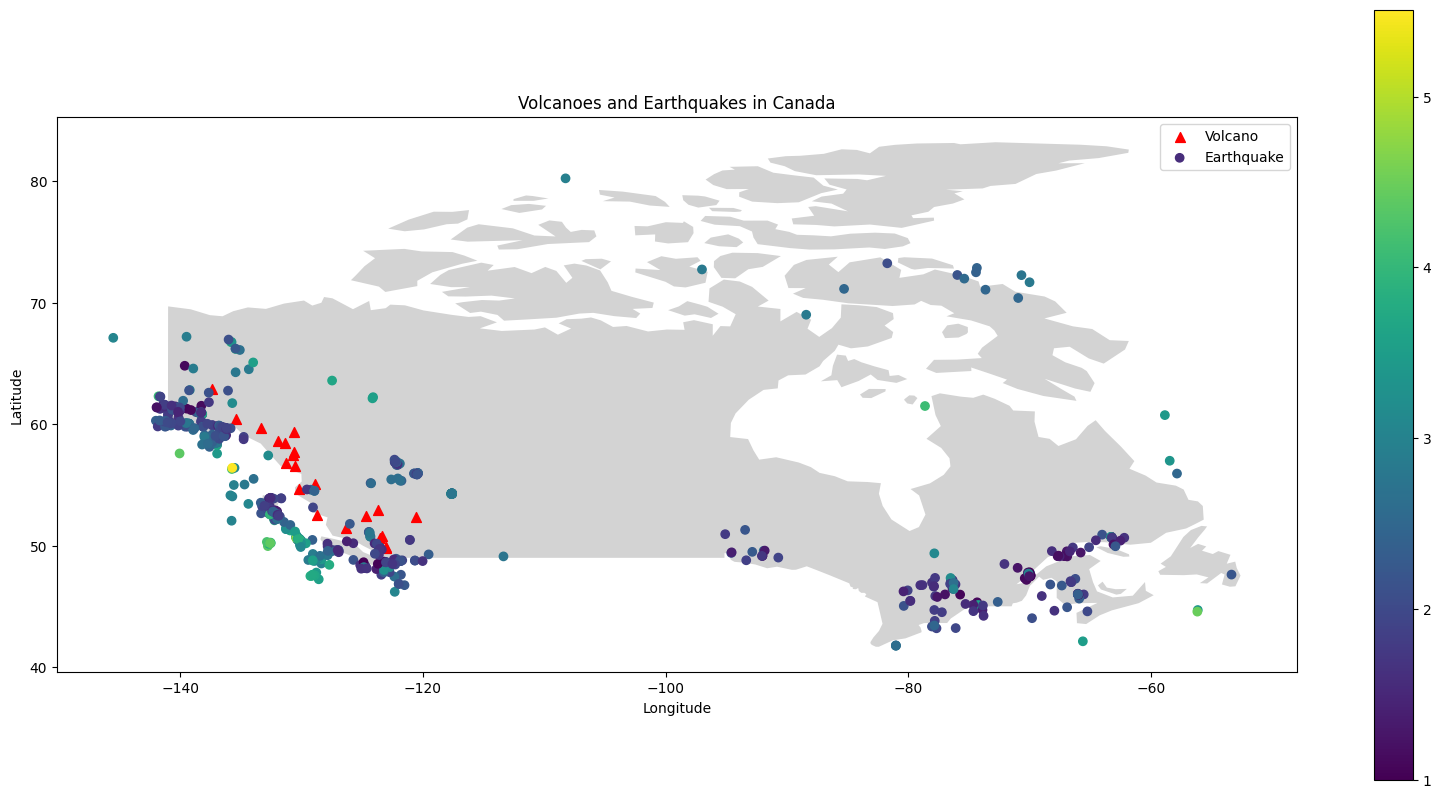

In [ ]:
# Plot world map
canada = world[world.name == 'Canada']
ax = canada.plot(figsize=(20, 10), color='lightgrey')

canada_volcanoes = volcano.loc[(volcano['Country'] == 'Canada')]

# Plot volcanoes
volcano_points = geopandas.GeoDataFrame(
    canada_volcanoes, geometry=geopandas.points_from_xy(canada_volcanoes.Longitude, canada_volcanoes.Latitude))
volcano_points.plot(ax=ax, color='red', marker='^', markersize=50, label='Volcano')

# Plot earthquakes
earthquake_points = geopandas.GeoDataFrame(
    earthquake, geometry=geopandas.points_from_xy(earthquake.Longitude, earthquake.Latitude))
earthquake_points.plot(ax=ax, column='Magnitude', cmap='viridis', legend=True, label='Earthquake')

# Add legend and title
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Volcanoes and Earthquakes in Canada')

# Show plot
plt.show()